In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<font size=5>**Load data**</font>

In [2]:
raw_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<font size=5>**Analysis columns**</font>

In [3]:
raw_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
raw_data.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font size=5>**Unknown handler**</font>

In [6]:
raw_data.drop(columns=['MoSold', 'YrSold', 'SaleType', 'SaleCondition'], inplace = True)

In [7]:
raw_data.drop(columns=['Id',], inplace = True)

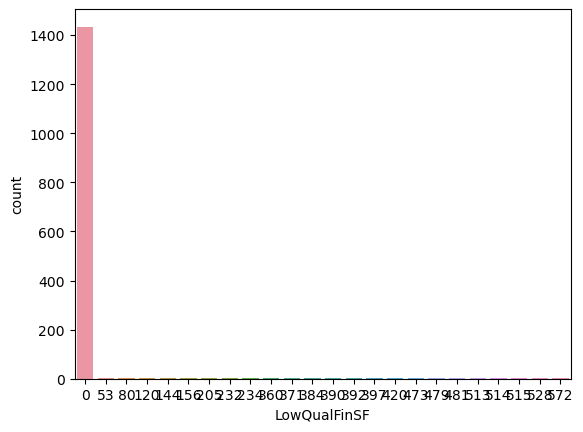

In [8]:
sns.countplot(x = 'LowQualFinSF', data = raw_data);

In [9]:
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(np.mean(raw_data['LotFrontage']))

In [10]:
raw_data['MasVnrType'] = raw_data['MasVnrType'].fillna('None')
raw_data['MasVnrArea'] = raw_data['MasVnrType'].fillna(0)

In [11]:
raw_data[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = raw_data[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NoBsmt')

In [12]:
raw_data['FireplaceQu'] = raw_data['FireplaceQu'].fillna('NoFireplace')

In [13]:
raw_data['Electrical'] = raw_data['Electrical'].fillna('SBrkr')

In [14]:
raw_data[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']] = raw_data[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']].fillna('NoGarage')

In [15]:
raw_data['GarageYrBlt'] = raw_data['GarageYrBlt'].fillna(0)

In [16]:
raw_data[['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]] = raw_data[['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]].fillna('None')

<font size=5>**Data prepocessing**</font>

In [17]:
cat_data = raw_data.select_dtypes(include=['object'])
numeric_data = raw_data.select_dtypes(exclude=['object'])
cat_cols = raw_data.select_dtypes(include=['object']).columns.values
numeric_cols = raw_data.select_dtypes(exclude=['object']).columns.values
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Street        1460 non-null   object
 2   Alley         1460 non-null   object
 3   LotShape      1460 non-null   object
 4   LandContour   1460 non-null   object
 5   Utilities     1460 non-null   object
 6   LotConfig     1460 non-null   object
 7   LandSlope     1460 non-null   object
 8   Neighborhood  1460 non-null   object
 9   Condition1    1460 non-null   object
 10  Condition2    1460 non-null   object
 11  BldgType      1460 non-null   object
 12  HouseStyle    1460 non-null   object
 13  RoofStyle     1460 non-null   object
 14  RoofMatl      1460 non-null   object
 15  Exterior1st   1460 non-null   object
 16  Exterior2nd   1460 non-null   object
 17  MasVnrType    1460 non-null   object
 18  MasVnrArea    1460 non-null   object
 19  ExterQ

In [18]:
raw_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [19]:
Rare_dic = {}
threshold = 0.03 
for feature in cat_cols:
    cats_counts = raw_data[feature].value_counts(normalize=True)
    rare_categories = cats_counts[cats_counts < threshold].index
    Rare_dic[feature] = list(rare_categories)
    if raw_data[feature].nunique() > 2:
        raw_data[feature] = raw_data[feature].apply(lambda x: 'other' if x in rare_categories else x)

In [20]:
Rare_dic

{'MSZoning': ['RH', 'C (all)'],
 'Street': ['Grvl'],
 'Alley': ['Pave'],
 'LotShape': ['IR2', 'IR3'],
 'LandContour': ['Low'],
 'Utilities': ['NoSeWa'],
 'LotConfig': ['FR3'],
 'LandSlope': ['Sev'],
 'Neighborhood': ['NoRidge',
  'Timber',
  'IDOTRR',
  'ClearCr',
  'StoneBr',
  'SWISU',
  'MeadowV',
  'Blmngtn',
  'BrDale',
  'Veenker',
  'NPkVill',
  'Blueste'],
 'Condition1': ['RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'],
 'Condition2': ['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe'],
 'BldgType': ['Twnhs', '2fmCon'],
 'HouseStyle': ['SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'],
 'RoofStyle': ['Flat', 'Gambrel', 'Mansard', 'Shed'],
 'RoofMatl': ['Tar&Grv',
  'WdShngl',
  'WdShake',
  'Metal',
  'Membran',
  'Roll',
  'ClyTile'],
 'Exterior1st': ['WdShing',
  'Stucco',
  'AsbShng',
  'BrkComm',
  'Stone',
  'AsphShn',
  'ImStucc',
  'CBlock'],
 'Exterior2nd': ['Wd Shng',
  'Stucco',
  'BrkFace',
  'AsbShng',
  'ImStucc',
  'Brk Cmn',
  'Stone',
  'AsphShn',
  'Other',
  'CB

/tmp/ipykernel_20/1632303192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(),fmt='.2f')


<Axes: >

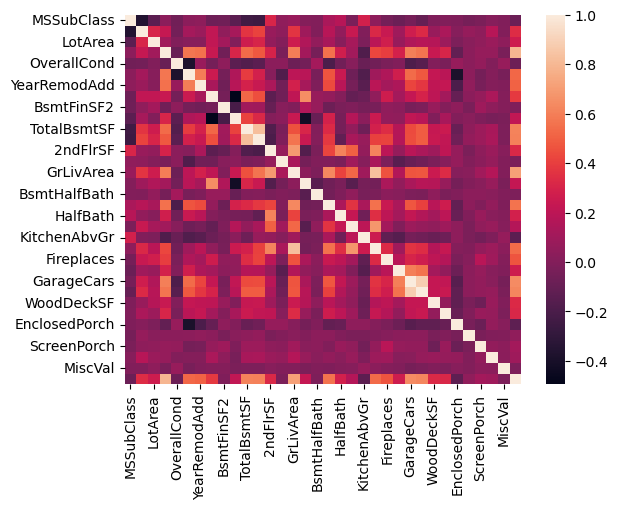

In [21]:
sns.heatmap(raw_data.corr(),fmt='.2f')

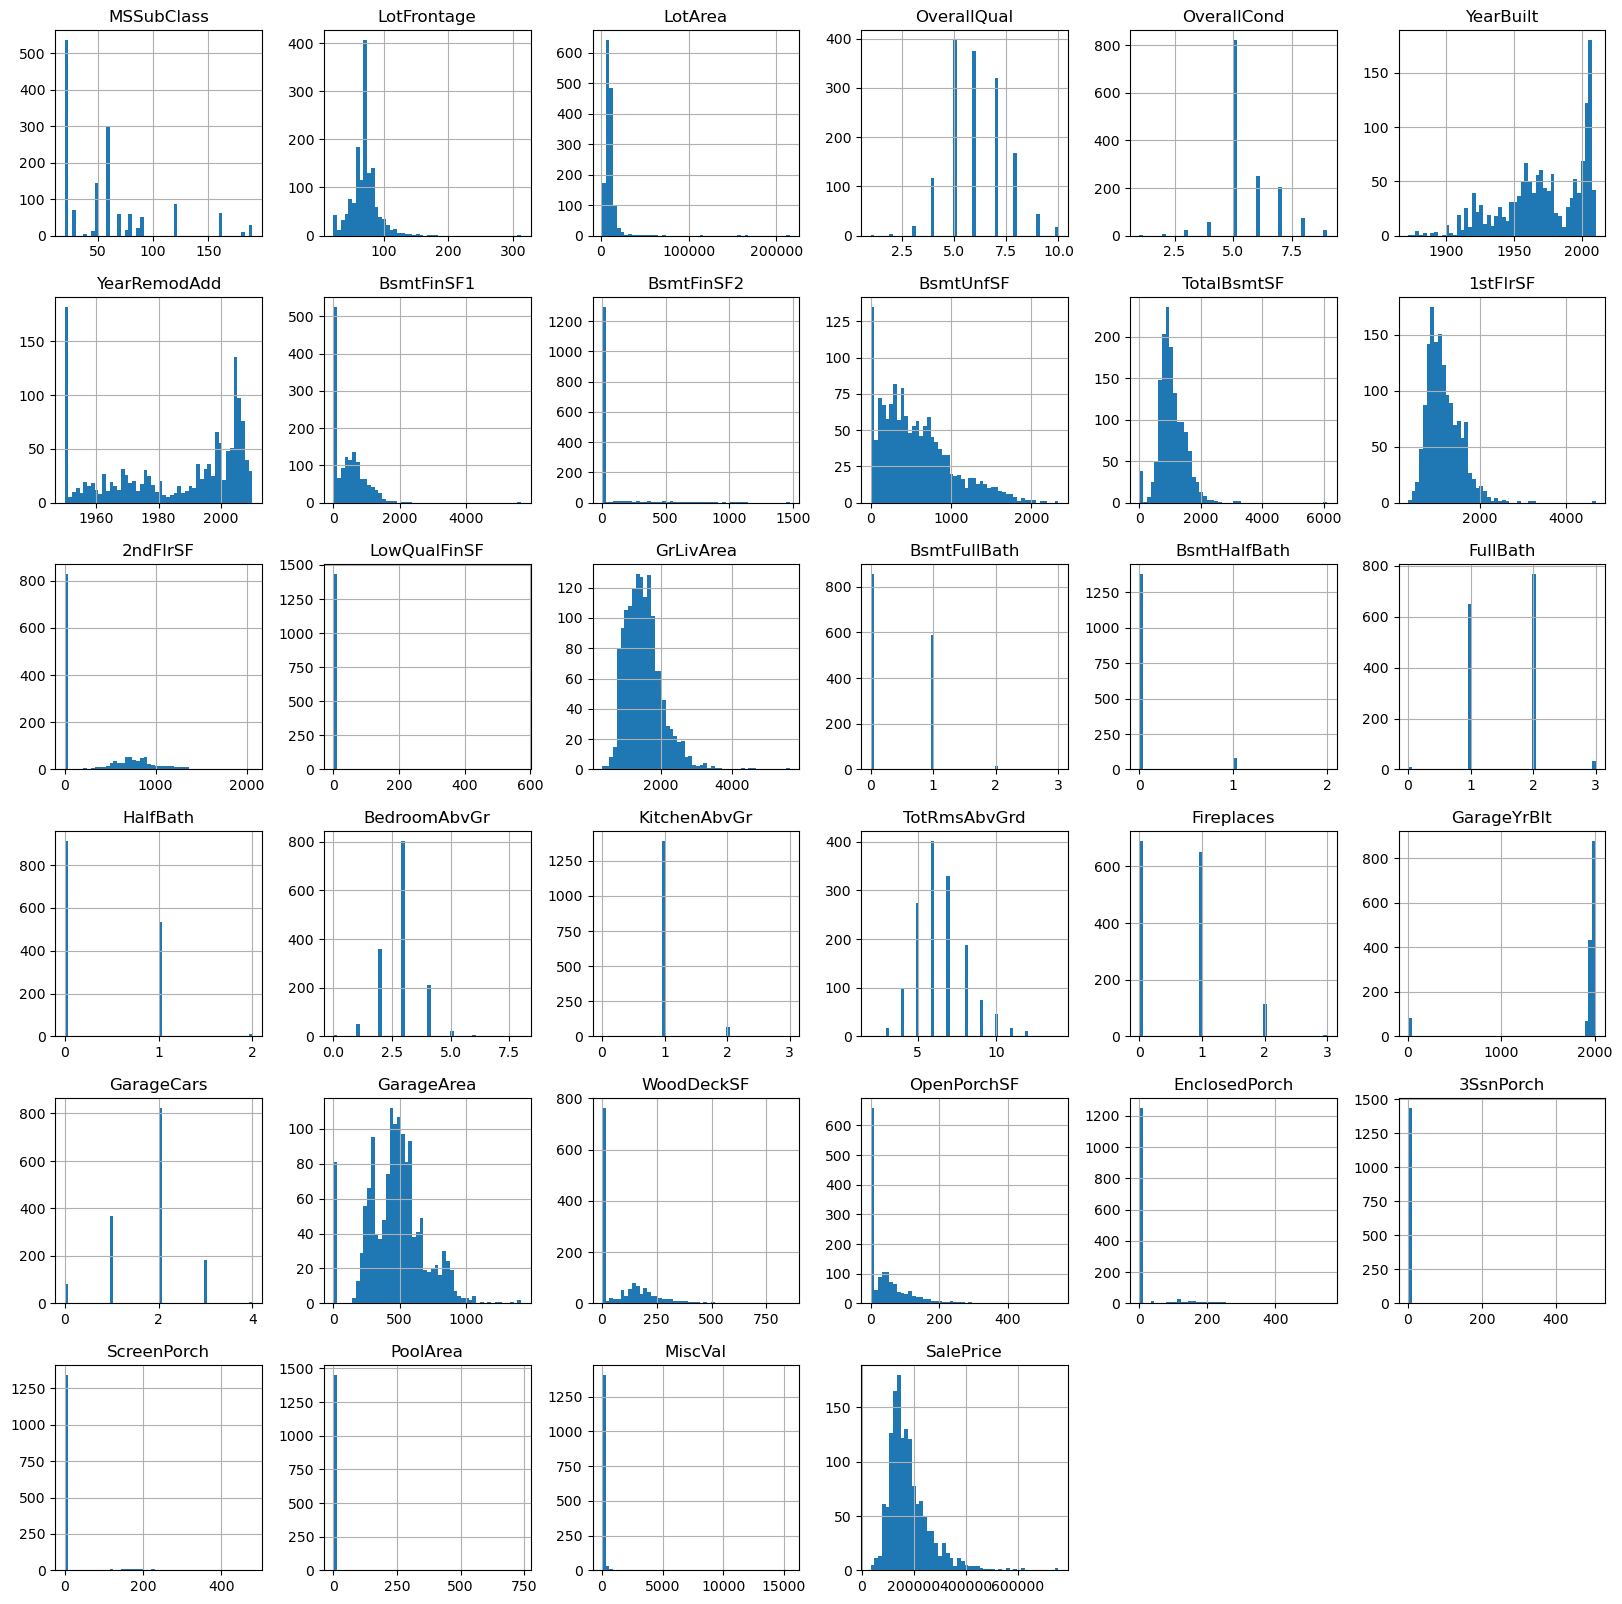

In [22]:
raw_data[numeric_cols].hist(bins=50, figsize=(20,20))
plt.show()

Useless features for model


In [23]:
raw_data.drop(['LowQualFinSF','ScreenPorch','BsmtFinSF2', 'EnclosedPorch', '3SsnPorch', 'MiscVal','PoolArea'], axis=1, inplace=True)

In [24]:
cat_data = raw_data.select_dtypes(include=['object'])
numeric_data = raw_data.select_dtypes(exclude=['object'])
cat_cols = raw_data.select_dtypes(include=['object']).columns.values
numeric_cols = raw_data.select_dtypes(exclude=['object']).columns.values
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Street        1460 non-null   object
 2   Alley         1460 non-null   object
 3   LotShape      1460 non-null   object
 4   LandContour   1460 non-null   object
 5   Utilities     1460 non-null   object
 6   LotConfig     1460 non-null   object
 7   LandSlope     1460 non-null   object
 8   Neighborhood  1460 non-null   object
 9   Condition1    1460 non-null   object
 10  Condition2    1460 non-null   object
 11  BldgType      1460 non-null   object
 12  HouseStyle    1460 non-null   object
 13  RoofStyle     1460 non-null   object
 14  RoofMatl      1460 non-null   object
 15  Exterior1st   1460 non-null   object
 16  Exterior2nd   1460 non-null   object
 17  MasVnrType    1460 non-null   object
 18  MasVnrArea    1460 non-null   object
 19  ExterQ

In [25]:
y = raw_data['SalePrice']
raw_data.drop(columns=['SalePrice',], inplace = True)
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [26]:
X = raw_data

In [27]:
cat_cols = raw_data.select_dtypes(include=['object']).columns.values
numeric_cols = raw_data.select_dtypes(exclude=['object']).columns.values

<font size=5>**Split data**</font>

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=50)

<font size=5>**data preparation pipeline**</font>

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), numeric_cols),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore'),
            cat_cols
        )
    ],
    verbose_feature_names_out = True,
)

alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', RandomForestRegressor())
])

<font size=5>**Grid_Search**</font>

In [30]:
params ={
    "alg__n_estimators": [100, 200, 300, 400 , 500 , 1000],   
    "alg__max_features": ['sqrt', 'log2'],                     
    "alg__min_samples_split": [2, 5, 10 , 20 , 50],            
    "alg__min_samples_leaf": [1, 2, 4 ,8],                     
    "alg__bootstrap": [True, False]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(
    alg,
    params,
    cv=5,
    verbose=0,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

rs.fit(X_train, y_train)
rs.best_params_

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'alg__n_estimators': 1000,
 'alg__min_samples_split': 5,
 'alg__min_samples_leaf': 2,
 'alg__max_features': 'sqrt',
 'alg__bootstrap': False}

<font size=5>**Make predict with best parametrs**</font>

In [32]:
from sklearn.metrics import r2_score,median_absolute_error

preds = rs.best_estimator_.predict(X_test)
r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.8907009222564771, 11105.588162582804)

<font size=5>**Predict with test data**</font>

In [33]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
test.drop(columns=['MoSold', 'YrSold', 'SaleType', 'SaleCondition'], inplace = True)
test.drop(columns=['Id',], inplace = True)
test['LotFrontage'] = test['LotFrontage'].fillna(np.mean(test['LotFrontage']))
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrType'].fillna(0)
test[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NoBsmt')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NoFireplace')
test['Electrical'] = test['Electrical'].fillna('SBrkr')
test[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']] = test[['GarageType', 'GarageFinish','GarageQual', 'GarageCond']].fillna('NoGarage')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test[['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]] = test[['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]].fillna('None')
test.fillna(0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,140,0,0,0,120,0,None,MnPrv,None,0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,393,36,0,0,0,0,None,None,Gar2,12500
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,212,34,0,0,0,0,None,MnPrv,None,0
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,360,36,0,0,0,0,None,None,None,0
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,0,82,0,0,144,0,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,None,None,None,0
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,24,0,0,0,0,None,None,None,0
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,474,0,0,0,0,0,None,None,None,0
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,80,32,0,0,0,0,None,MnPrv,Shed,700


In [35]:
test = test.fillna(0)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [37]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [38]:
predict_test = rs.best_estimator_.predict(test)

In [39]:
submission['SalePrice'] = predict_test
submission.head()

,Id,SalePrice
0,1461,124319.320817
1,1462,154011.305467
2,1463,185422.931872
3,1464,191283.640026
4,1465,192331.269404


In [40]:
submission.to_csv('submission_lr.csv', index=None)

<font size=5>**Boosting with CatBoost**</font>

In [41]:
!pip install catboost

In [42]:
from catboost import CatBoostRegressor, Pool, cv

In [43]:
train_dataset_for_boosting = Pool(data=X_train,
                                  label=y_train,
                                  cat_features=cat_cols)

test_dataset_for_boosting = Pool(data=X_test,
                                  label=y_test,
                                  cat_features=cat_cols)

In [44]:
boosting_params ={
    "iterations": [100, 200, 300, 400 , 500 , 1000],   
    'depth' : np.arange(1,11),
    'learning_rate': [0.01, 0.03, 0.05, 0.001,0.005]
}

In [45]:
model = CatBoostRegressor(eval_metric='RMSE',
                         logging_level='Silent',)

In [46]:
search = model.randomized_search(boosting_params, train_dataset_for_boosting, cv=5, plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
model.best_score_

{'learn': {'RMSE': 17562.34596495469}}

In [48]:
test_dataset = Pool(data=test,
                    cat_features=cat_cols)

In [49]:
predict_test = model.predict(test_dataset)

In [50]:
predict_test

array([124404.18563356, 157493.45574929, 183348.95128107, ...,
       179924.92993949, 120924.75206344, 233993.97428582])

In [51]:
boosting_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [52]:
boosting_submission['SalePrice'] = predict_test
boosting_submission.head()

,Id,SalePrice
0,1461,124404.185634
1,1462,157493.455749
2,1463,183348.951281
3,1464,187938.980376
4,1465,197516.910356


In [53]:
boosting_submission.to_csv('boosting_submission.csv', index=None)

In [54]:
boosting_submission_2 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [55]:
model_2 = CatBoostRegressor(eval_metric='RMSE',
                         logging_level='Silent',)

In [56]:
model_2.fit(train_dataset_for_boosting)

In [57]:
predict_test_2 = model.predict(test_dataset)

In [58]:
boosting_submission_2['SalePrice'] = predict_test_2
boosting_submission_2.head()

,Id,SalePrice
0,1461,124404.185634
1,1462,157493.455749
2,1463,183348.951281
3,1464,187938.980376
4,1465,197516.910356


In [59]:
boosting_submission_2.to_csv('boosting_submission_2.csv', index=None)